**In this exersise We will work on Fashion MNIST data set.**

In [ ]:
# Import tensorflow library
import tensorflow as tf

In [ ]:
# Load the MNIST data set from keras datasets API
mnist = tf.keras.datasets.fashion_mnist

In [14]:
# Assign train and test data while loading the dataset
(training_images, training_labels),(test_images, test_labels) = mnist.load_data()

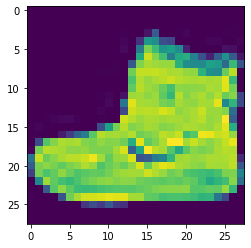

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
# We can notice image size is 28*28

In [15]:
print(training_images[1])
print(training_labels[1])

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  1

***By above syntax we came to know that all the image data is between 0 to 255, We know that Neural network works better when data is in between 0 to 1. So, Lets normalise the data.***



In [ ]:
training_images = training_images / 255
test_images = test_images /255

In [18]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.6):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

In [19]:
callbacks = myCallback()

**Sequential**: Defines a SEQUENCE of layerrs in neural network

**Flatten** : Turns square shape images into 1 dimmensional data set.

**Dense** : Adds a layer of neurons

Each layer of neurons need an **Activation Function** to tell them what to do

**Relu** Effectively means "*if x > 0 return x else 0"*

**Softmax** takes a set of values, and effectively picks the biggest one, Mostly used in final layer

In [ ]:
#Lets design the model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation = tf.nn.softmax)])

In [20]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
1846/1875 [============================>.] - ETA: 0s - loss: 0.5086 - accuracy: 0.8297
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5086 - accuracy: 0.8296


In [21]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.5384 - accuracy: 0.8287


[0.5384393334388733, 0.8287000060081482]